#### Generate series of images

In [1]:
import pandas as pd
import json
import os
import itertools
import random
seed=7
random.seed(seed)

In [2]:
#load data.json into dataframe 
data_experiment = pd.read_json('client/src/data.json')
data_experiment.shape

(896, 9)

Cada serie tiene:
    
    - 5 img x experimento de cada grupo
$5*4*7 == 140 imgs$

de las 56 restantes -> Agrego al azar 9 a cada serie y salvo a dos que le agrego 10

In [3]:
#reparto las imagenes en 6 series 
images_to_split = data_experiment
series = []
for serie_idx in range(6):
    current_serie = []
    for group in range(4):
        images_of_group = images_to_split[images_to_split['group'] == group+1]
        for experiment in data_experiment['experiment'].unique():
            images_of_group_and_exp = images_of_group[images_of_group['experiment'] == experiment]
            img_selected = images_of_group_and_exp.sample(n=5, random_state=seed)
            img_id_selected = img_selected.id.tolist()
            current_serie += img_id_selected
            images_to_split = images_to_split.drop(img_selected.index)
    series.append(current_serie)

for i in range(6):
    if i < 4:
        n = 9
    else:
        n = 10
    selected_img = images_to_split.sample(n=n, random_state=seed)
    series[i] += selected_img.id.tolist()
    images_to_split = images_to_split.drop(selected_img.index)

#### generate 10 permutations of each serie

In [4]:
final_series = []
for i in range(10):
    for serie_idx in range(6):
        permutations_selected = random.shuffle(series[serie_idx])
        final_series.append(series[serie_idx])

(array([[28., 27., 22., 10.,  0.,  0.,  7., 25., 10., 20.],
        [25., 28., 32.,  1.,  0.,  0., 17., 20.,  6., 20.],
        [26., 31., 25.,  4.,  0.,  0., 14., 23.,  6., 20.],
        [26., 31., 20.,  7.,  0.,  0.,  9., 29.,  5., 22.],
        [29., 27., 17.,  9.,  0.,  0.,  8., 28.,  9., 23.],
        [30., 32., 17.,  8.,  0.,  0., 14., 17.,  9., 23.],
        [28., 27., 22., 10.,  0.,  0.,  7., 25., 10., 20.],
        [25., 28., 32.,  1.,  0.,  0., 17., 20.,  6., 20.],
        [26., 31., 25.,  4.,  0.,  0., 14., 23.,  6., 20.],
        [26., 31., 20.,  7.,  0.,  0.,  9., 29.,  5., 22.],
        [29., 27., 17.,  9.,  0.,  0.,  8., 28.,  9., 23.],
        [30., 32., 17.,  8.,  0.,  0., 14., 17.,  9., 23.],
        [28., 27., 22., 10.,  0.,  0.,  7., 25., 10., 20.],
        [25., 28., 32.,  1.,  0.,  0., 17., 20.,  6., 20.],
        [26., 31., 25.,  4.,  0.,  0., 14., 23.,  6., 20.],
        [26., 31., 20.,  7.,  0.,  0.,  9., 29.,  5., 22.],
        [29., 27., 17.,  9.,  0.,  0.,  

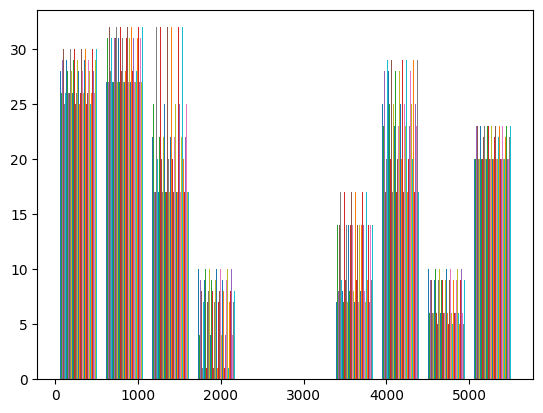

In [7]:
from matplotlib import pyplot as plt

plt.hist(final_series, bins=10)

(array([164., 176., 133.,  39.,   0.,   0.,  69., 142.,  45., 128.]),
 array([   0. ,  555.8, 1111.6, 1667.4, 2223.2, 2779. , 3334.8, 3890.6,
        4446.4, 5002.2, 5558. ]),
 <BarContainer object of 10 artists>)

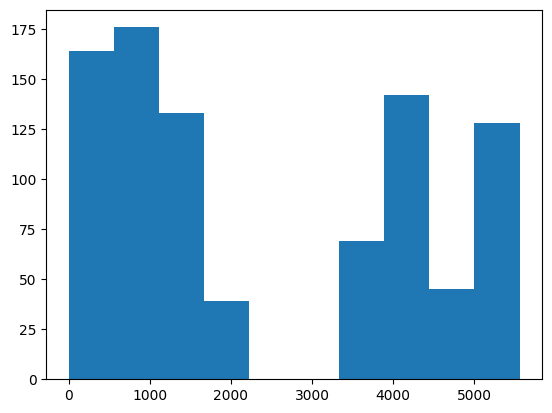

In [8]:
plt.hist(data_experiment['id'])

In [ ]:
#export this list into a json file
with open('id_images_series.json', 'w') as f:
    json.dump(final_series, f)